## Table of Contents

1. [About Project Euler](#About-Project-Euler)
2. [Disclaimer](#Disclaimer)
3. [Problem 60](#Problem-60)
4. [Required Modules](#Required-Modules)
5. [Main Solution](#Main-Solution)
6. [Big O Notation](#Big-O-Notation)

## About Project Euler <a name="About-Project-Euler"></a>


"Project Euler exists to encourage, challenge, and develop the skills and enjoyment of anyone with an interest in the fascinating world of mathematics."

For more info about the project please check [the official website](https://projecteuler.net/about).




## Disclaimer <a name="Disclaimer"></a>
This solution is provided as a personal interpretation and implementation of the Project Euler problem stated in the [Project Euler website](https://projecteuler.net). It is intended for educational and learning purposes only. The problem statement, including any accompanying examples or test cases, is the intellectual property of Project Euler, and all rights are reserved by them.

Please refrain from copying or reproducing this solution directly for any purpose that violates the copyright of Project Euler. Instead, use it as a reference or learning resource to enhance your problem-solving skills.

## Problem 60 <a name="Problem-60"></a>

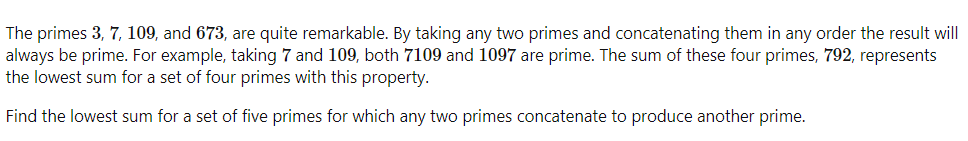

<br>
$**Hint**$

This one is a bit challenging. just believe in the Power of Python set (or hash map)  
:-)

## Required Modules <a name="Required-Modules"></a>

In [ ]:
import time   #Capturing the execution time
from sympy import isprime
from collections import defaultdict

## Main Solution <a name="Main-Solution"></a>

First of all, Let's difine a function that gives us all primes below a given number. If you follow my other solutions you know what is the right algorithm to do that ... that's right ... sieve. In case you don't know what I mean please just check the problem 50 first then come back.

In [ ]:
def generate_primes_below(n):
    sieve = [True]*(n+1)
    sieve[0] = sieve[1] = False
    p = 2
    while p**2<n:
        for i in range(p**2,n+1,p):
            sieve[i] = False
        p += 1

    primes = {str(p) for p in range(len(sieve)) if sieve[p]}
    return primes

Now since the question doesn't specify any limit, we have to guess the limit ourselves. and with a little luck we came up with the right guess which is 10,000.

Then we try to find the desired primes. It's better to start with comparing 2 numbers and then move up to the next level untill we reach our 5 primes.

In [ ]:
start_time = time.time()

limit = 10**4           #guess
primes = generate_primes_below(limit)

s1 = defaultdict(set)   #storing candidates for 1st and 2nd prime
s2 = set()              #storing candidates for 3rd prime
s3 = set()              #storing candidates for 4th prime
s4 = set()              #storing candidates for 5th prime
y = set()               #output

for a in primes:
    s1[a].add(None)

    for b in s1:
        if isprime(int(a + b)) and isprime(int(b + a)):
            #bild all 1st and 2nd primes
            s1[b].add(a)
            s1[a].add(b)

            #store all pair primes
            s2.add((b, a))

    for c in s2:
        if a in s1[c[0]] and a in s1[c[1]]:
            #Store all 3 primes
            s3.add((c[0], c[1], a))
    for d in s3:
        if a in s1[d[0]] and a in s1[d[1]] and a in s1[d[2]]:
            #store all 4 primes
            s4.add((d[0], d[1], d[2], a))
    for e in s4:
        if a in s1[e[0]] and a in s1[e[1]] and a in s1[e[2]] and a in s1[e[3]]:
            #store all 5 primes
            y.add((a, e[0], e[1], e[2], e[3]))


# finding minimum of the solutions
minimum = float ("inf")
for i in y:
    sum = 0
    for j in i:
        sum += int(j)

    if sum < minimum:
        minimum = sum
answer = minimum

end_time = time.time()
execution_time = end_time - start_time

print("Final Answer:",answer,"\nExecution time:","{:.4f}".format(execution_time), "seconds")

Final Answer: 26033 
Execution time: 5.8250 seconds


## Big O Notation <a name="Big-O-Notation"></a>
Big O Notation is a tool used to describe the **time complexity of algorithms**. It calculates the time taken to run an algorithm as the input grows. In other words, it calculates **the worst-case time complexity of an algorithm**.

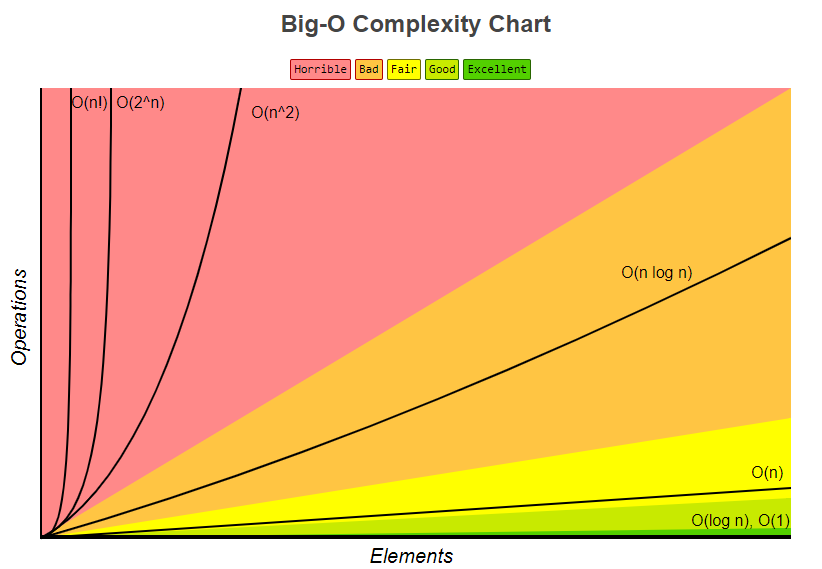

The time and space complexity of my code can be analyzed as follows:

1. Time Complexity:
   - Generating Primes: The `generate_primes_below(n)` function uses the Sieve of Eratosthenes algorithm to generate prime numbers up to the given limit `n`. The time complexity of this function is approximately $O(n *log ( log (n) ))$.
   - Nested Loops: The code contains several nested loops that iterate over the primes and combinations of primes. The number of iterations depends on the number of primes generated and stored in various sets (`s1`, `s2`, `s3`, `s4`, `y`). Let's denote the number of primes as `p`. The time complexity of the nested loops can be approximated as $O(p^4)$.

   Therefore, the overall **time complexity** can be estimated as $O(n *log(log( n)) + p^4)$.

2. Space Complexity:
   - Primes Set: The `primes` set stores all the generated primes below the given limit `n`. The space complexity of this set is $O(n)$.
   - Sets and Tuples: The sets `s1`, `s2`, `s3`, `s4`, and `y` store various combinations of primes. The size of these sets depends on the number of primes generated (`p`). The space complexity of these sets can be approximated as $O(p)$ in total.
   - Additional Variables: The code uses a few additional variables with constant space requirements.

   Therefore, the overall **space complexity** can be estimated as $O(n + p)$.
